In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import random

import yfinance as yf

In [2]:
from pyts.image import GramianAngularField
from pyts.image import MarkovTransitionField
from pyts.image import RecurrencePlot

In [3]:
# 시각화 관련 ##
import plotly_express as px
import plotly.figure_factory as ff
import cufflinks as cf
cf.go_offline(connected=True)
## cf.getThemes()
cf.set_config_file(theme='polar')
import plotly.graph_objects as go

import matplotlib
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
## plt.style.use("fivethirtyeight")
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["figure.figsize"] = (10,6)

In [4]:
##절대경로 참조
import sys, os
sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname('__file__'))))

from library.quant_functions import anal_funcs, data_funcs

In [5]:
## TS2IM
def rec_plot(s,eps=0.01, steps=10):
    N = s.size
    S = np.repeat(s[None,:],N, axis=0)
    Z = np.floor((S-S.T)/eps)
    Z[Z>steps] = steps
    return Z

In [6]:
# Define the inputs
dow_jones_url = 'https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average'
dow_jones_table = pd.read_html(dow_jones_url)[1]
dow_jones_tickers = dow_jones_table['Symbol'].tolist()

In [ ]:
df = data_funcs.get_merged_df('^IXIC', '^GSPC', 'MMM', 'AXP', 'AMGN', 'AAPL', 'BA',
                              'CAT', 'CVX', 'CSCO', 'KO', 'DIS', 'DOW', 'GS', 'HD',
                              'HON', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK', 'MSFT',
                              'NKE', 'PG', 'CRM', 'TRV', 'UNH', 'VZ', 'V', 'WBA', 'WMT')

In [7]:
cols = df.columns

In [17]:
for ticker in cols:
    dataset = df[[ticker]].dropna().copy()
    dataset['rets5'] = df[ticker].pct_change(5)
    dataset['rets'] = df[ticker].pct_change()

    ## threshold(1std)
    upper = dataset['rets5'].mean() + 2*dataset['rets5'].std()
    lower = dataset['rets5'].mean() - 2*dataset['rets5'].std()

    upper_norm = dataset['rets5'].mean() + .5*dataset['rets5'].std()
    lower_norm = dataset['rets5'].mean() - .5*dataset['rets5'].std()

    ## threshold 이상 변동에 대해 레이블
    dataset['label'] = 3
    dataset['label'][dataset['rets5'] >= upper] = 2
    dataset['label'][dataset['rets5'] <= lower] = 0
    dataset['label'][(dataset['rets5'] >= lower_norm)&(dataset['rets5'] <= upper_norm)] = 1
    dataset['label'] = dataset['label'].shift(-(5+1))

    window_lens = 52
    idxs = dataset.index[window_lens:]
    sample_size = int(len(idxs)*.05)

    sample0_index = random.sample(list(dataset[window_lens:][dataset['label'] == 0].index), int(sample_size*.3))
    sample1_index = random.sample(list(dataset[window_lens:][dataset['label'] == 1].index), int(sample_size*.3))
    sample2_index = random.sample(list(dataset[window_lens:][dataset['label'] == 2].index), int(sample_size*.3))

    idxs = [sample0_index, sample1_index, sample2_index]
    labels = ['bear', 'norm', 'bull']

    save_path = 'D:/GC에이블/TS2IM/data'
    for i, _idxs in enumerate(idxs):
        label = labels[i]
        for i, _idx in enumerate(_idxs):
            ts = np.array(dataset['rets5'][:_idx].tail(window_lens))
            img = rec_plot(ts, 0.001)
            plt.imsave(f'{save_path}/{label}/{ticker}_{label}_{i}.jpg', img)
            ##plt.imshow(img)
            ## plt.show()

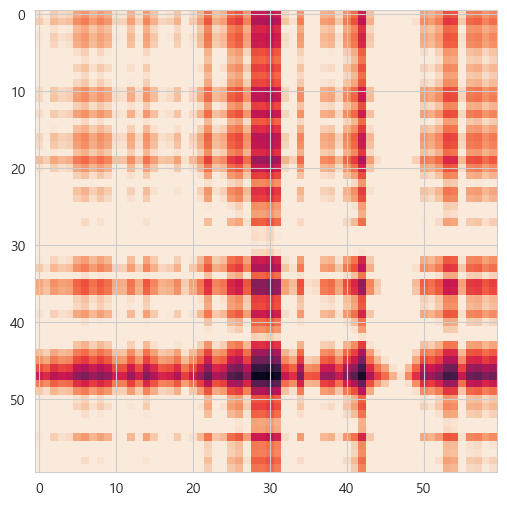

In [16]:
plt.imshow(img)
plt.show()